In this notebook I'm going to try to compare different models of predicting whether a costumer will renew their contract or not. Knowing whether a costumer is likely to stay is very important from a business perspective and understanding why they will or won't renew is important can help the business with improving their services. 

**Table of contents:**
1. Data exploration
2. Creating models
    1. Logistic regression
    2. Decision tree
    3. Gradient boosting
    4. Support vector machine
3. Conclusion

# 1. Data exploration


Loading necessary libraries and the dataset.

In [62]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix, classification_report

In [2]:
df = pd.read_csv("telecom_users.csv")
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [4]:
print(df.columns)

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')


We don't seem to have any missing values but the columns "Unnamed: 0" and "costumerID" probably won't be useful and we can get rid of them. Before we drop the unnamed column we should check if there is any correlation between it and the churn.

In [5]:
test_frame = df[["Unnamed: 0", "Churn"]]
test_frame = pd.get_dummies(test_frame, drop_first=True)
test_frame.corr()

,Unnamed: 0,Churn_Yes
Unnamed: 0,1.00000,0.00663
Churn_Yes,0.00663,1.00000


We can see that there is very small correlation so we won't lose anything important with droping this column.

In [6]:
df.drop(["Unnamed: 0", "customerID"], axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


Let's split the data into two different data frames. The first one will only have costumers who have renewed their contract while the second one will have costumers who didn't.

In [7]:
df_churn_yes = df[df["Churn"] == "Yes"] 
df_churn_no = df[df["Churn"] == "No"]

Let's start by looking at the "tenure" and "MonthlyCharges" columns and seeing whether there is some correlation between them and churn.

In [8]:
test_frame = df[["tenure", "MonthlyCharges", "Churn"]]
test_frame = pd.get_dummies(test_frame, drop_first=True)
test_frame.corr()

,tenure,MonthlyCharges,Churn_Yes
tenure,1.000000,0.256983,-0.348469
MonthlyCharges,0.256983,1.000000,0.186753
Churn_Yes,-0.348469,0.186753,1.000000


It seems that the correlation between choosen columns is rather weak but we can see that people who have been with the company for longer seem less likely to not renew their contract.

Let's see whether there is a clear difference between costumers who churned or not on the following plots:

<AxesSubplot:title={'center':'Non churned customers'}, ylabel='tenure'>

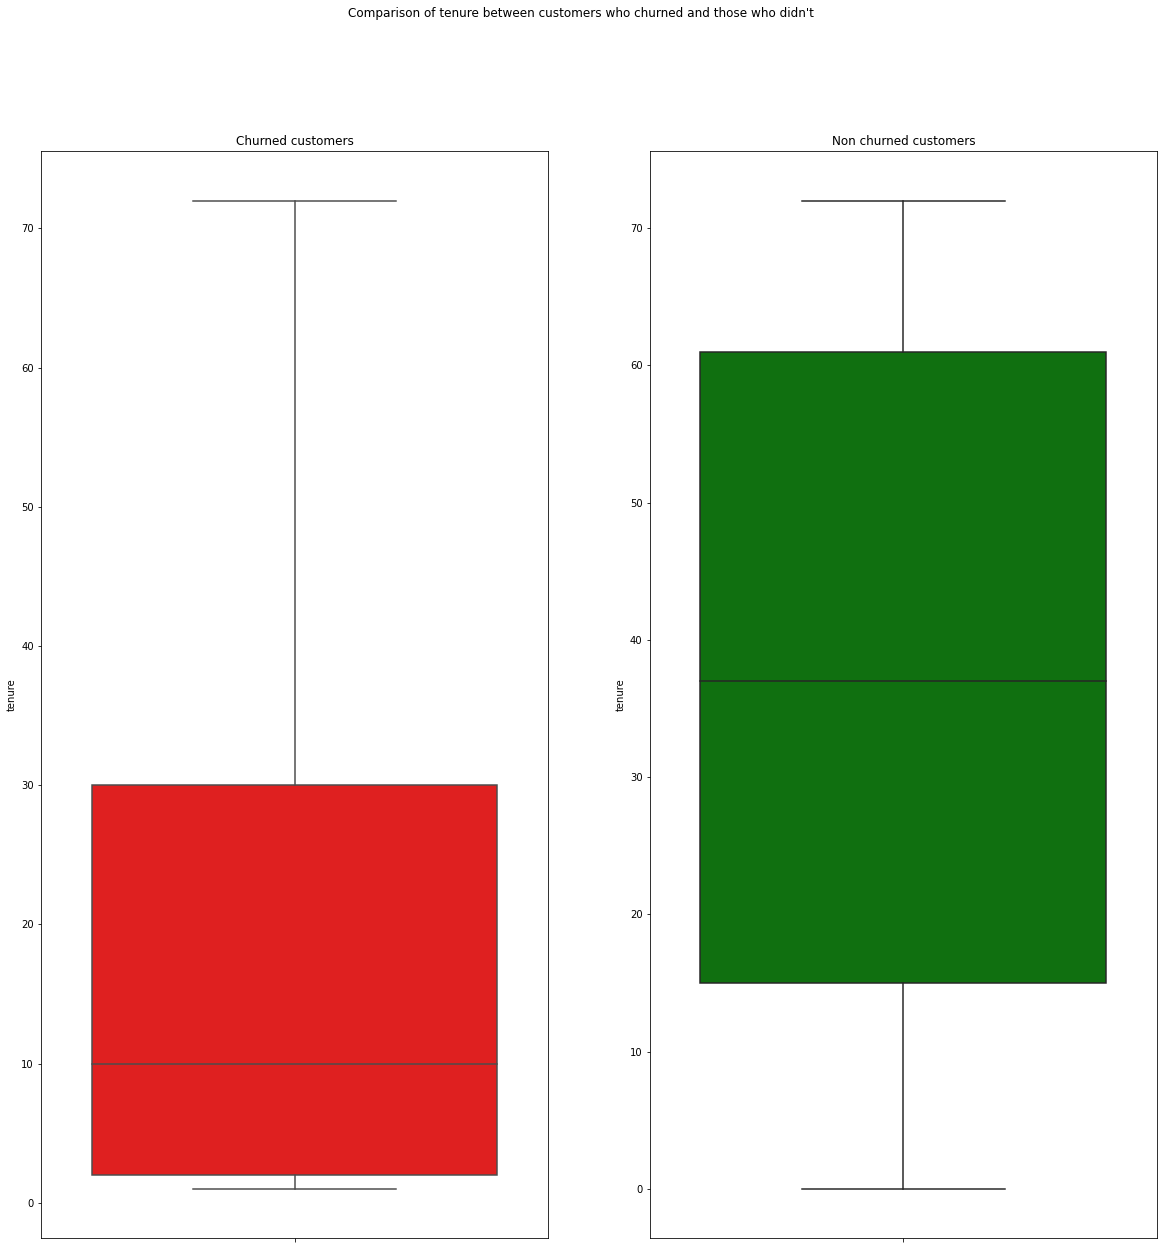

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(20, 20))
fig.suptitle("Comparison of tenure between customers who churned and those who didn't")
axe = axes[0]
axe.set_title("Churned customers")
sns.boxplot(ax=axe, data=df_churn_yes, hue="Churn", y="tenure", color="red")
axe = axes[1]
axe.set_title("Non churned customers")
sns.boxplot(ax = axe, data=df_churn_no, hue="Churn", y="tenure", color="green")

We can see that customers who churned are staying with the company for shorter amount of time whereas customers who stayed have been staying with the company for longer. We can have a conclusion from this that customers who have been staying with the company for longer are less likely to leave which matches up with our previous correlation result.

<AxesSubplot:title={'center':'Non churned customers'}, ylabel='MonthlyCharges'>

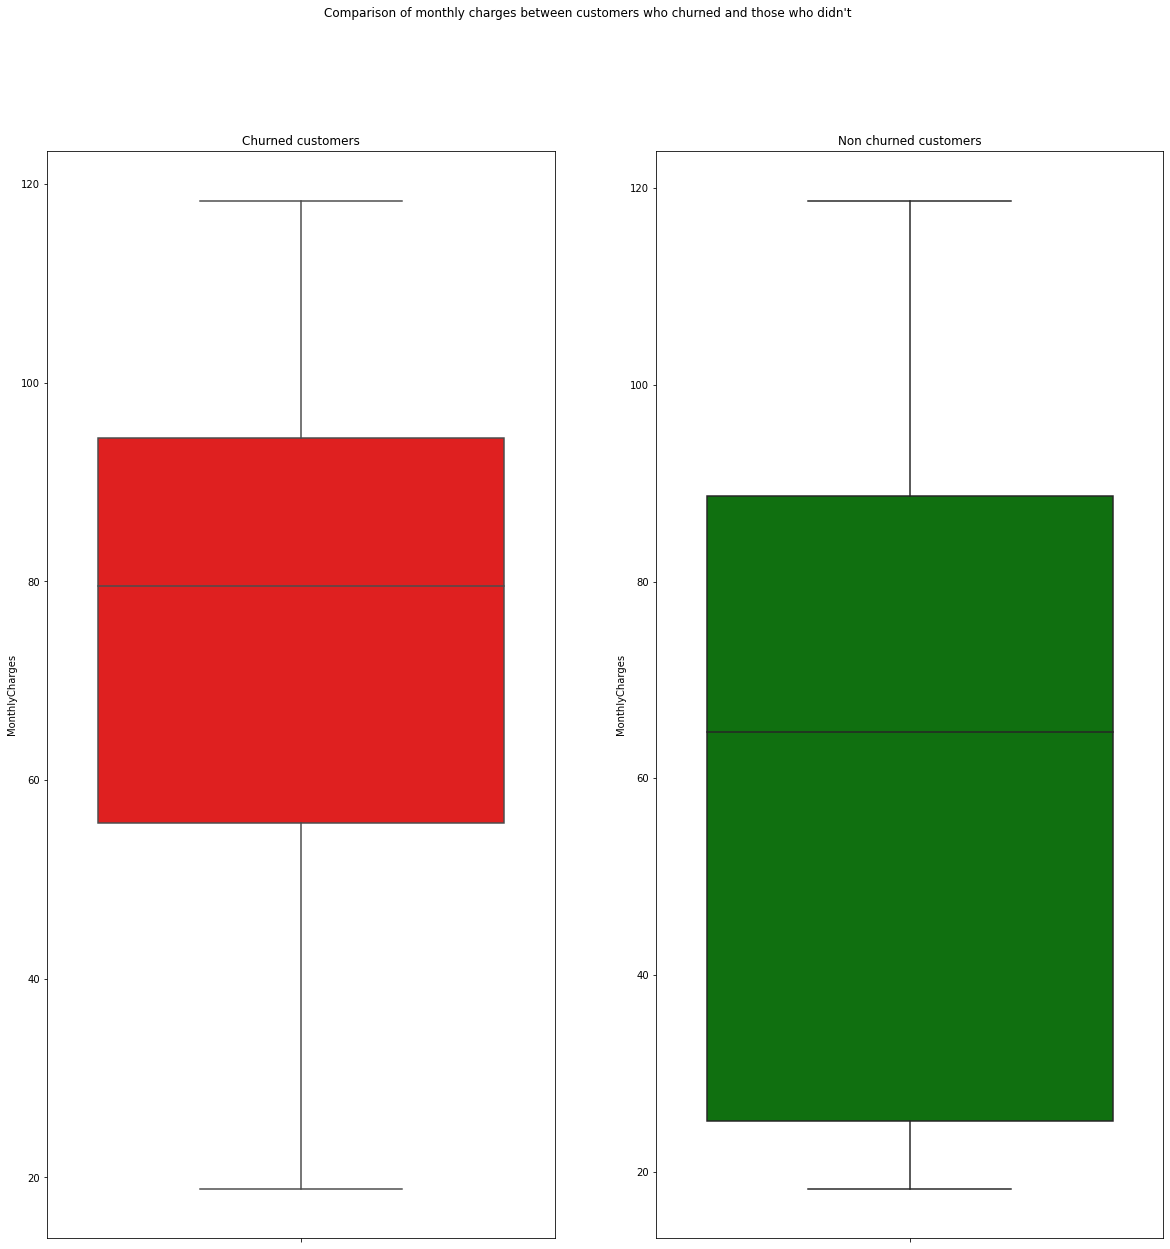

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(20, 20))
fig.suptitle("Comparison of monthly charges between customers who churned and those who didn't")
axe = axes[0]
axe.set_title("Churned customers")
sns.boxplot(ax = axe, data=df_churn_yes, hue="Churn", y="MonthlyCharges", color="red")
axe = axes[1]
axe.set_title("Non churned customers")
sns.boxplot(ax = axe, data=df_churn_no, hue="Churn", y="MonthlyCharges", color="green")

We can see that customers who are not renewing their contracts seem to have higher monthly charges to pay. Let's check whether people who have been using the service for longer period of time with high monthly charges are likely to stay with the company.

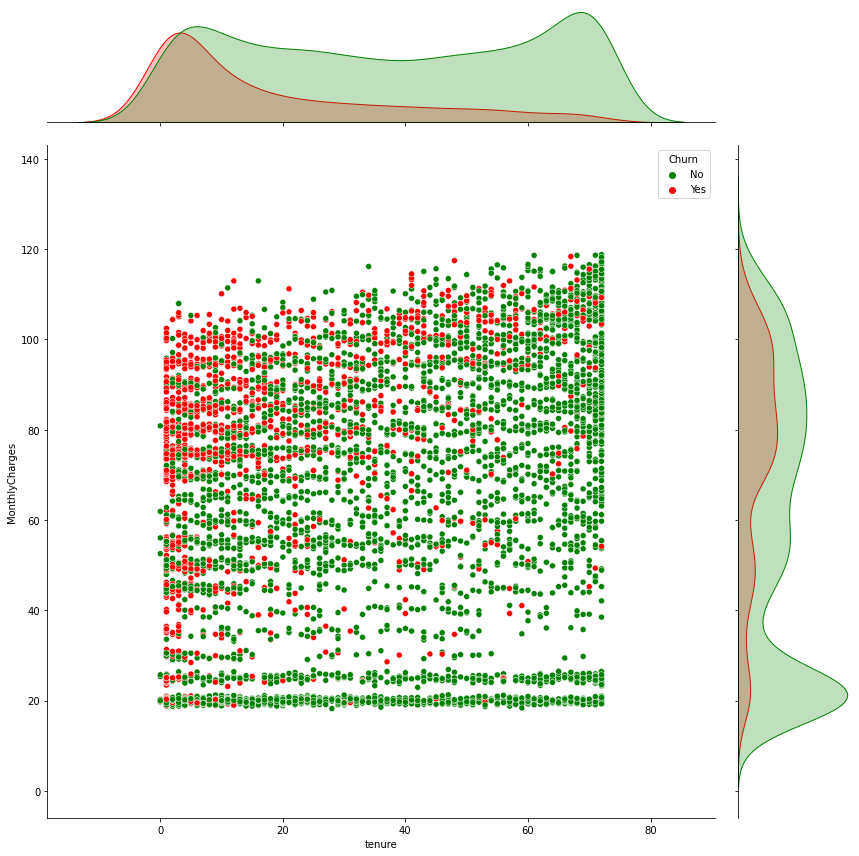

In [11]:
sns.jointplot(data=df, x="tenure", y="MonthlyCharges", hue="Churn", hue_order=["No", "Yes"], palette=["green", "red"], height=12)

From the plot we can see that people who have high monthly charges and who have been with the company not too long are unlikely to stay but as the tenure increases the probability of one staying even with high monthly cost increases.

# 2. Creating models
In this chapter we will create different models for predicting churn.

# A. Logistic regression

Creating the testing and training datasets.

In [30]:
x = pd.get_dummies(df.drop("Churn", axis=1), drop_first=True)
y = df["Churn"]
x_train, x_test, y_train, y_test = train_test_split(x_logistic_regression, y_logistic_regression, test_size=0.3, random_state=1337)

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [13]:
logistic_regression = LogisticRegression(max_iter=2000, penalty="l2", C=0.1, solver="saga", n_jobs=-1)
logistic_regression.fit(x_train, y_train)

LogisticRegression(C=0.1, max_iter=2000, n_jobs=-1, solver='saga')

In [27]:
y_pred_test = logistic_regression.predict(x_test)

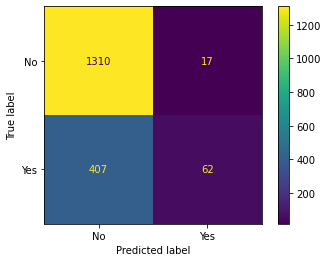

In [28]:
plot_confusion_matrix(logistic_regression, x_test, y_test)

In [29]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.76      0.99      0.86      1327
         Yes       0.78      0.13      0.23       469

    accuracy                           0.76      1796
   macro avg       0.77      0.56      0.54      1796
weighted avg       0.77      0.76      0.70      1796



The accuracy we were able to achieve with logistic regression is around 77% but it has a lot of false negatives.

# B. Decision tree

In [37]:
decision_tree = DecisionTreeClassifier(class_weight="balanced")
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

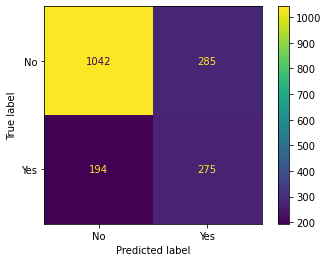

In [45]:
plot_confusion_matrix(decision_tree, x_test, y_test)

In [43]:
y_pred_test = decision_tree.predict(x_test)

In [44]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.84      0.79      0.81      1327
         Yes       0.49      0.59      0.53       469

    accuracy                           0.73      1796
   macro avg       0.67      0.69      0.67      1796
weighted avg       0.75      0.73      0.74      1796



As we can see we get around 70% accuracy and it has a lot more false positives than linear regression but it deals better with false negatives.

# C. Gradient boosting

In [57]:
gradient_boosting = GradientBoostingClassifier(learning_rate=0.1, n_estimators=1000, loss="exponential", max_depth=4)
gradient_boosting.fit(x_train, y_train)

GradientBoostingClassifier(loss='exponential', max_depth=4, n_estimators=1000)

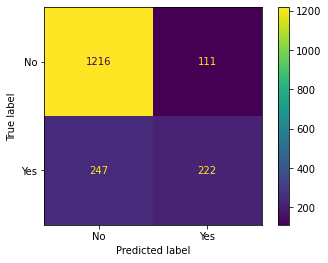

In [58]:
plot_confusion_matrix(gradient_boosting, x_test, y_test)

In [59]:
y_pred_test = gradient_boosting.predict(x_test)

In [60]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.83      0.92      0.87      1327
         Yes       0.67      0.47      0.55       469

    accuracy                           0.80      1796
   macro avg       0.75      0.69      0.71      1796
weighted avg       0.79      0.80      0.79      1796



We can see that we get around 75%-80% accuracy with gradient boosting, the false positives and false negatives are on similar level with the decision tree algorithm.

# D. Support vector machine

In [82]:
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(x, y, test_size=0.3, random_state=1337)
scale_min = MinMaxScaler()
x_train_svm = scale_min.fit_transform(x_train_svm)
x_test_svm = scale_min.transform(x_test_svm)
svm = SVC(C=1.5, kernel="poly", degree=4, class_weight="balanced", max_iter=10000)
svm.fit(x_train_svm, y_train_svm)

SVC(C=1.5, class_weight='balanced', degree=4, kernel='poly', max_iter=10000)

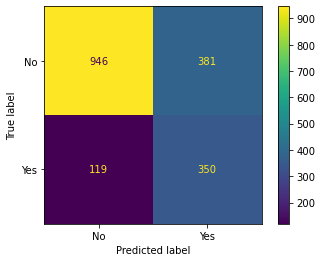

In [83]:
plot_confusion_matrix(svm, x_test_svm, y_test_svm)

In [84]:
y_pred_test_svm = svm.predict(x_test_svm)

In [81]:
print(classification_report(y_test_svm, y_pred_test_svm))

              precision    recall  f1-score   support

          No       0.90      0.40      0.55      1327
         Yes       0.34      0.88      0.49       469

    accuracy                           0.52      1796
   macro avg       0.62      0.64      0.52      1796
weighted avg       0.75      0.52      0.54      1796



As we can see our average accuracy is slightly lower compared to the previous models. The false positives are also high.

# 3. Conclusion

We can see that of the choosen four models gradient boosting gets the best accuracy with decent false positives/negatives results. We could also use GridSearchCV from sklearn library to try to optimize best parameters for each model but it would take significant time to search for all the possible combinations and probably won't give us significantly better results.

From the data exploration we could also conclude that a good strategy would be having low monthly cost for new costumers so they stay with you longer thus increasing the likelihood of them renewing their contract. 